In [1]:
%load_ext autoreload
%autoreload 2

# stickleback

A Python package for finding *point behaviors* in longitudinal sensor data.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from stickleback.stickleback import Stickleback
plt.rcParams['figure.figsize'] = [12, 8]

## Usage

Read the example data (longitudinal sensor data and events) and visualizing them.

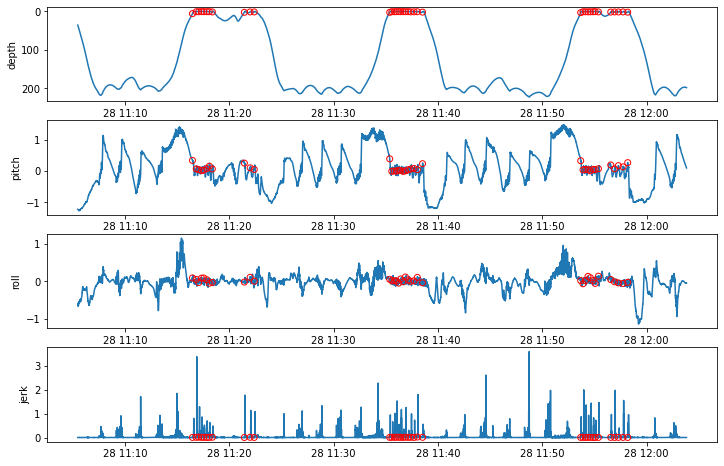

In [3]:
# Read example data
breath_sb = Stickleback(
    sensors=pd.read_pickle("../data/bw180828-49_prh10.pkl"), 
    events=pd.DatetimeIndex(pd.read_pickle("../data/bw180828-49_breaths.pkl")),
    win_size=50, min_period=10
)

ex_data_plot = breath_sb.plot_sensors_events(interactive=False)

Create the training dataset using all known events and an equal sample size of randomly selected non-events. This dataset must bein `sktime`-compatible nested `DataFrame` format.

In [4]:
breath_sb.sample_nonevents()
print("+: {}\n-: {}".format(breath_sb.event_idx, breath_sb.nonevent_idx))
breath_sb.extract_training_data()
display(breath_sb.clf_data.head())
display(breath_sb.clf_data.tail())
print("labels: {} ... {}".format(breath_sb.clf_labels[0:5], breath_sb.clf_labels[-5:]))

+: [ 6595  6811  6955  7110  7245  7418  7564  7737  9579  9911 10148 17936
 18057 18197 18318 18454 18567 18705 18836 18994 19144 19333 19523 19824
 28917 29049 29188 29337 29473 29627 29747 29935 30645 30860 31083 31351
 31619]
-: [  600  1000  1100  1300  2550  3000  3250  3300  3450  4150  4800  5700
  9100  9800 10950 11500 11800 12650 12750 14950 16750 18900 21150 22850
 23300 23400 25650 26200 26600 27250 28850 29800 30800 32150 33200 33800
 34400]


,depth,pitch,roll,jerk
2018-08-28 11:16:28.799961600-07:00,0 8.524934 1 8.407864 2 8.328285 3...,0 0.391649 1 0.390356 2 0.388123 3...,0 0.062171 1 0.062613 2 0.066430 3...,0 0.000482 1 0.001706 2 0.000945 3...
2018-08-28 11:16:50.399961600-07:00,0 1.871734 1 1.871996 2 1.865896 3...,0 0.024523 1 0.026714 2 0.033379 3...,0 -0.014675 1 -0.008177 2 -0.002214 3...,0 0.004494 1 0.012125 2 0.011467 3...
2018-08-28 11:17:04.799990400-07:00,0 1.191275 1 1.215262 2 1.198636 3...,0 -0.026526 1 -0.023736 2 -0.023228 3...,0 -0.020246 1 -0.017659 2 -0.014465 3...,0 0.001929 1 0.002002 2 0.000595 3...
2018-08-28 11:17:20.299977600-07:00,0 1.028728 1 1.075976 2 1.109939 3...,0 -0.033782 1 -0.030068 2 -0.029444 3...,0 -0.034393 1 -0.027231 2 -0.013348 3...,0 0.010653 1 0.024147 2 0.020379 3...
2018-08-28 11:17:33.799977599-07:00,0 0.712816 1 0.767345 2 0.795046 3...,0 -0.027812 1 -0.023714 2 -0.020215 3...,0 -0.049878 1 -0.042558 2 -0.036323 3...,0 0.007274 1 0.005021 2 0.001588 3...


,depth,pitch,roll,jerk
2018-08-28 11:56:49.300022400-07:00,0 2.265947 1 2.256048 2 2.294137 3...,0 -0.114625 1 -0.113691 2 -0.111680 3...,0 0.061878 1 0.061498 2 0.056007 3...,0 0.001233 1 0.004454 2 0.001413 3...
2018-08-28 11:59:04.300022400-07:00,0 47.607095 1 47.690341 2 47.82035...,0 -0.974533 1 -0.973029 2 -0.972539 3...,0 -0.923944 1 -0.930288 2 -0.935450 3...,0 0.001537 1 0.000824 2 0.000450 3...
2018-08-28 12:00:49.299955200-07:00,0 215.800888 1 215.828191 2 215.86...,0 -0.135512 1 -0.142331 2 -0.167142 3...,0 0.165530 1 0.164725 2 0.184486 3...,0 0.004601 1 0.134978 2 0.204012 3...
2018-08-28 12:01:49.300003200-07:00,0 197.606949 1 197.617928 2 197.65...,0 0.211313 1 0.210034 2 0.207935 3...,0 -0.093218 1 -0.094637 2 -0.095686 3...,0 0.000397 1 0.000538 2 0.000811 3...
2018-08-28 12:02:49.299964800-07:00,0 219.167206 1 219.138793 2 219.08...,0 0.090400 1 0.069413 2 0.047710 3...,0 -0.416390 1 -0.446528 2 -0.474443 3...,0 0.110023 1 0.136613 2 0.116764 3...


labels: ['event', 'event', 'event', 'event', 'event'] ... ['nonevent', 'nonevent', 'nonevent', 'nonevent', 'nonevent']


Using the training data: fit the model, make predictions, and assess in-sample accuracy.

TP: 37, FP: 116, FN: 0


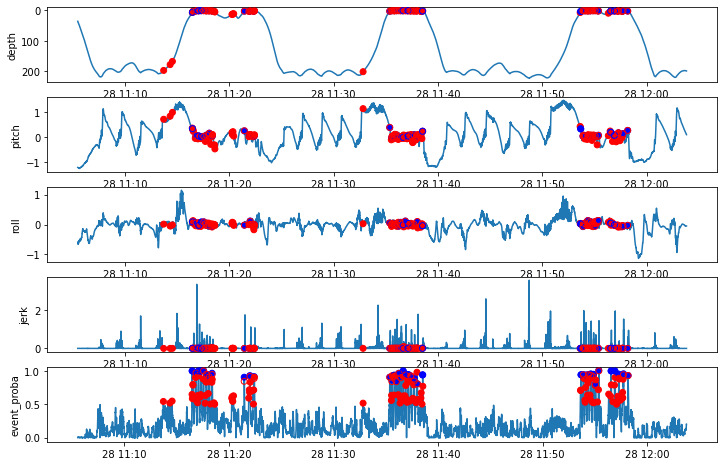

In [5]:
breath_sb.fit()
breath_sb.predict_self(nth=5)
breath_sb.assess(tol=40)
tp, fp, fn = (np.sum(breath_sb.outcomes == o) for o in ["TP", "FP", "FN"])
print("TP: {}, FP: {}, FN: {}".format(tp, fp, fn))
first_predictions = breath_sb.plot_predictions(interactive=False)

The randomly sampled non-events are unlikely to contain much useful information for differentiating events from things that *almost* look like events. That's why the first round of predictions have many true positives and few false negatives, but many false positives as well. The false positives are *almost* events that we use to refine the model.

TP: 31, FP: 0, FN: 6


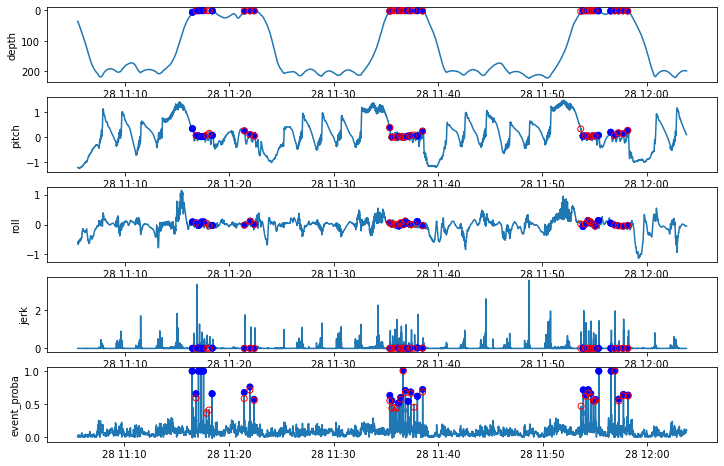

In [6]:
breath_sb.refit()
breath_sb.predict_self(nth=5)
breath_sb.assess(tol=40)
tp, fp, fn = (np.sum(breath_sb.outcomes == o) for o in ["TP", "FP", "FN"])
print("TP: {}, FP: {}, FN: {}".format(tp, fp, fn))
second_predictions = breath_sb.plot_predictions(interactive=False)